## The purpose of this file
**Remove search tag** and more node, if necessary, from the original aam to make optimization feasible.<br>
Make an **modified aggregate adjacency matrix** and save it.

In [1]:
import sys
sys.path.append('../')
import powerlaw
import networkx as nx
import toolbox as tb
%matplotlib inline

In [2]:
tag = "explore_hiroshima"
hashtag = "じゃけぇ広島に恋しとる" # This variable is necessary for data processing in the module 'toolbox'.
timespan = "21-29"
tau = 235
G = nx.read_graphml(f'../data/graph_data/{tag}/original/{hashtag}_{timespan}_{tau}_aam.graphml')

In [3]:
ag = tb.AggregateNetwork(G, tau, hashtag)

In [4]:
ag.tau, ag.searchtag, ag.G.number_of_nodes()

(235, 'じゃけぇ広島に恋しとる', 2345)

In [5]:
# Check hubs
ag.check_degree()

isolate:[]


,degree
じゃけぇ広島に恋しとる,2344
ミタイケンひろしま,1256
ひろしまにあ,1212
好きじゃけぇ広島,1157
ええじゃろ広島,1100
...,...
ハンバーグ,5
serakogenfarm,5
今田農園の里芋,4
TCR,4


In [6]:
ag.remove_searchtag()

Isolates after removal of the searchtag: 
[]
These isolate nodes are to be removed.
The isolate nodes were successfully deleted.


In [7]:
# Check hubs
ag.check_degree()

isolate:[]


,degree
ミタイケンひろしま,1255
ひろしまにあ,1211
好きじゃけぇ広島,1156
ええじゃろ広島,1099
ひろたび2022,1034
...,...
世羅高原農場キャンドルナイト2022,4
染と茶,4
GIANT,3
TCR,3


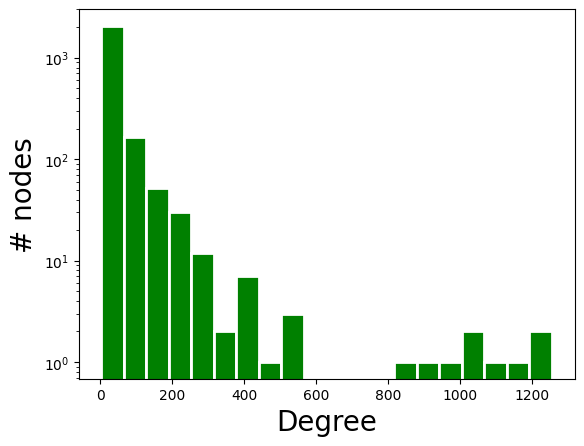

In [8]:
ag.plot_dd(20)

In [9]:
tb.fit_power_law(G)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.5902591680834037, 
its standard error sigma: 0.0683074801768134, 
k_min: 45.0


(2.5902591680834037, 0.0683074801768134, 45.0)

In [10]:
tb.compare_distribution(G,"power_law", "exponential")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms exponential distribution with significance level 1.3282221860400815e-07.


In [11]:
tb.compare_distribution(G,"power_law", "lognormal")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms lognormal distribution with significance level 0.781724077643797.


In [12]:
# Save figure for future use
fname1 = f"../data/figure/degree_distribution/pdfccdf1_{tag}_{timespan}_{tau}.pdf"
fname2 = f"../data/figure/degree_distribution/pdfccdf2_{tag}_{timespan}_{tau}.pdf"

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.5902591680834037, 
its standard error sigma: 0.0683074801768134, 
k_min: 45.0


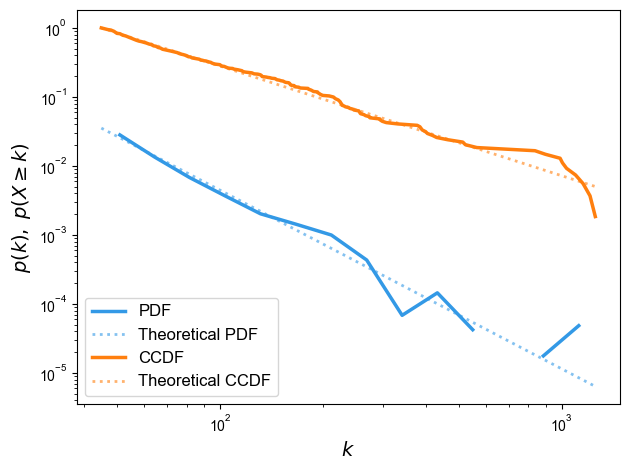

In [13]:
tb.plot_pdf_ccdf(G, Pcolor="#3399e6", Ccolor="#FF7F0E", fname=fname1)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.5902591680834037, 
its standard error sigma: 0.0683074801768134, 
k_min: 45.0


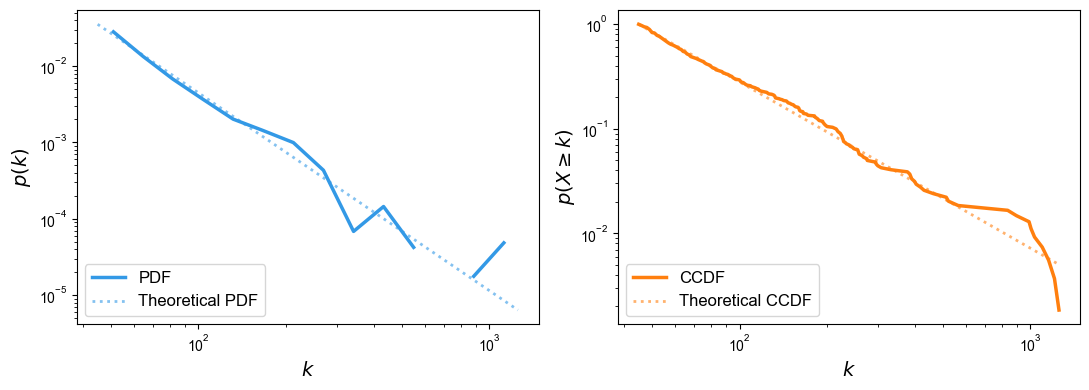

In [14]:
tb.plot_pdf_ccdf(G, sep=True, Pcolor="#3399e6", Ccolor="#FF7F0E", fname=fname2)

In [15]:
# Save modified aam for statistical test
nx.write_graphml(ag.G, f'../data/graph_data/{tag}/modified/{hashtag}_{timespan}_{tau}_mdaam.graphml', encoding='utf-8')